In [47]:
from src.models import Sequential
from src.layers import *
from src.activation_functions import *
from src.loss_functions import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [48]:
NOISE = 1
SAMPLES = 1337
CLASSES = 10
TRAIN_SPLIT = 0.8
TEST_SPLIT = 0.2

EPOCHS = 100
LEARNING_RATE = 0.001

In [49]:
X, y = datasets.make_blobs(n_samples=SAMPLES, centers=CLASSES, cluster_std=NOISE)

copy_y = y
y = y.reshape(y.shape[0], 1)

one_hot = OneHotEncoder(sparse_output=False)
y = one_hot.fit_transform(y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT, test_size=TEST_SPLIT, stratify=y)

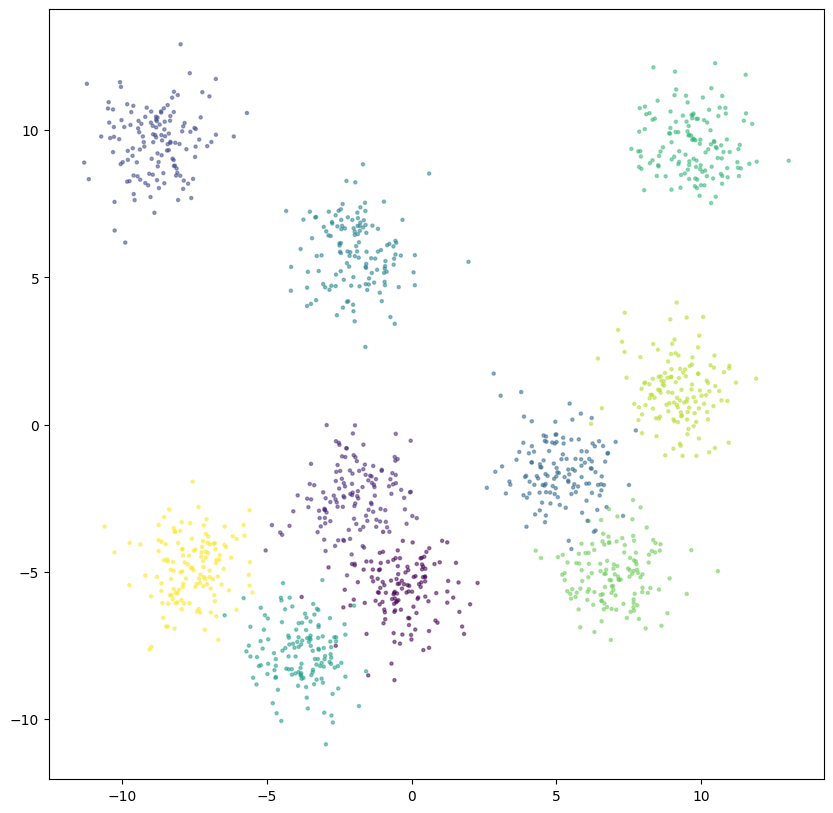

In [51]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=copy_y, alpha=0.5, s=5)

In [52]:
model = Sequential(epochs=EPOCHS, learning_rate=LEARNING_RATE, loss_function=CrossEntropy(), batch_size=1)

In [53]:
model.add(Linear(n_inputs=len(X[0]), n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=10))
model.add(Activation(Softmax()))

In [54]:
model.train(X_train, y_train)

100%|██████████| 100/100 [01:16<00:00,  1.30it/s,  Loss: 0.03286492534186764]


In [55]:
y_pred = model.predict(X_test)

In [56]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
y_pred2 = np.argmax(y_pred, axis=1)

In [58]:
y_test2 = np.argmax(y_test, axis=1)

Czulosc: 1.0
Swoistosc: 1.0
Accuracy: 1.0
F1 score: 0.9776119402985075
BA score: 0.9776353276353277


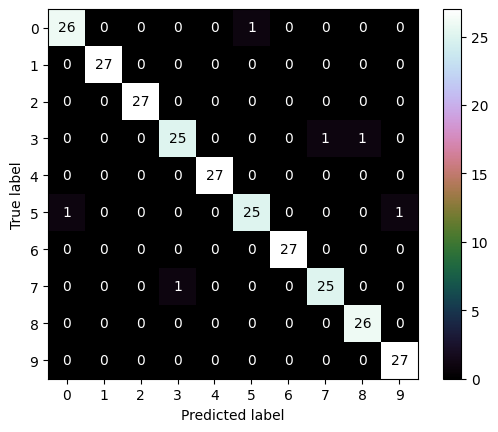

In [59]:
cm_model = confusion_matrix(y_test2, y_pred2)
tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

# fpr, tpr, roc_auc = roc_curve(y_test, y_pred)
#
# rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
# rok_model.plot()

print("Czulosc:", tp_model / (tp_model + fn_model))
print("Swoistosc:", tn_model / (tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

# print("ROC auc:", roc_auc_score(y_test, y_pred))
print("F1 score:", f1_score(y_test2, y_pred2, average='micro'))
print("BA score:", balanced_accuracy_score(y_test2, y_pred2))